In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
airline = pd.read_excel('F:\Data Science\Data sets\\Airlines.xlsx')
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
airline.shape

(96, 2)

In [6]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

### Visualization

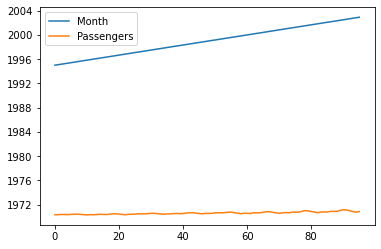

In [8]:
airline.plot()
pyplot.show()

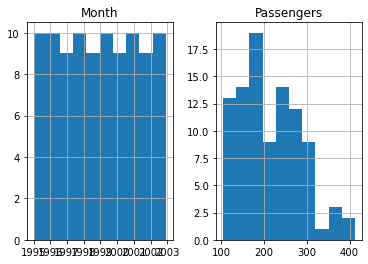

In [9]:
#histogram

airline.hist()
pyplot.show()

C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

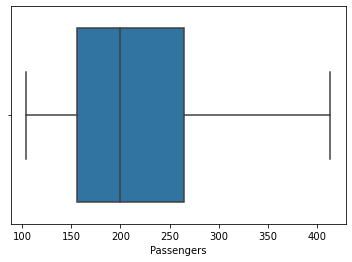

In [12]:
sns.boxplot(airline['Passengers'])

<AxesSubplot:ylabel='Density'>

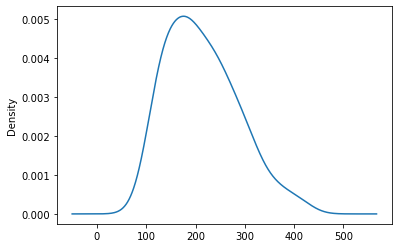

In [14]:
airline['Passengers'].plot(kind='kde')

In [16]:
# Lag plot
from pandas.plotting import lag_plot

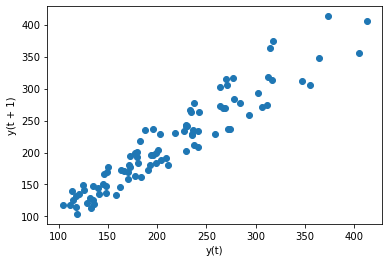

In [18]:
lag_plot(airline['Passengers'])
pyplot.show()

### Forecasting

In [19]:
import warnings
import itertools
import statsmodels.api as sm

In [20]:
# Separate out validation data set
split_point = len(airline) - 10
dataset, validation = airline[0:split_point], airline[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Dataset 86, Validation 10


#### Base model

In [21]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
train = read_csv('dataset.csv', header=None, index_col = 0, parse_dates = True, squeeze =True)
x = train.values
#x = x.astypes('float32')
train_size = int(len(x)* 0.65)
train, test = x[0:train_size], x[train_size:]

C:\Users\Shriprada\AppData\Local\Temp\ipykernel_15852\586889070.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col = 0, parse_dates = True, squeeze =True)


### Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
airline.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [26]:
scaler = MinMaxScaler(feature_range = (0,1))
airline = scaler.fit_transform(airline.iloc[:,1:])

In [27]:
airline.shape

(96, 1)

In [28]:
airline

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [29]:
training_size = int(len(airline)*0.65)

In [30]:
training_size

62

In [31]:
test_size = len(airline) - training_size

In [33]:
test_size

34

In [35]:
train_data, test_data = airline[0:training_size,:], airline[training_size:len(airline),:1]

In [36]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [37]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [38]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [39]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [41]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [42]:
X_train.shape

(57, 4, 1)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose =1)

Epoch 1/100
57/57 [==============================] - 6s 18ms/step - loss: 0.0194 - val_loss: 0.0738
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0369
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0310
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0463
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0356
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0350
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0277
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0363
Epoch 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0455
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0392
Epoch 11

In [46]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [47]:
test_predict

array([[0.507175  ],
       [0.6034669 ],
       [0.4795796 ],
       [0.35942605],
       [0.34470937],
       [0.30993748],
       [0.42542177],
       [0.44046837],
       [0.35760057],
       [0.50542927],
       [0.4798051 ],
       [0.44704476],
       [0.64238894],
       [0.76454335],
       [0.54259014],
       [0.43909332],
       [0.43493366],
       [0.37798616],
       [0.57671314],
       [0.5458673 ],
       [0.4416783 ],
       [0.6328246 ],
       [0.5626446 ],
       [0.53961486],
       [0.7917476 ],
       [0.82795167],
       [0.6389687 ],
       [0.49073842],
       [0.46735075]], dtype=float32)

In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
test_predict

array([[260.7171 ],
       [290.47128],
       [252.1901 ],
       [215.06265],
       [210.5152 ],
       [199.77069],
       [235.45534],
       [240.10474],
       [214.49858],
       [260.17764],
       [252.25978],
       [242.13683],
       [302.4982 ],
       [340.2439 ],
       [271.66037],
       [239.67984],
       [238.39452],
       [220.79773],
       [282.20438],
       [272.673  ],
       [240.47859],
       [299.54282],
       [277.85718],
       [270.741  ],
       [348.65002],
       [359.83707],
       [301.44135],
       [255.63817],
       [248.41138]], dtype=float32)

In [50]:
y_train.shape,train_predict.shape,train_predict

((57,),
 (57, 1),
 array([[134.1908  ],
        [127.97849 ],
        [143.759   ],
        [154.04915 ],
        [151.32574 ],
        [140.4662  ],
        [127.56586 ],
        [116.150696],
        [129.27534 ],
        [122.542465],
        [133.24586 ],
        [147.2483  ],
        [138.98738 ],
        [131.61487 ],
        [158.0057  ],
        [175.0972  ],
        [169.31175 ],
        [158.16705 ],
        [138.2042  ],
        [125.67576 ],
        [151.89403 ],
        [150.33832 ],
        [153.56935 ],
        [183.83867 ],
        [161.31767 ],
        [174.72513 ],
        [182.23048 ],
        [201.37032 ],
        [195.41425 ],
        [177.71153 ],
        [162.30725 ],
        [153.20567 ],
        [176.20566 ],
        [175.01373 ],
        [181.10353 ],
        [194.56012 ],
        [177.22314 ],
        [183.52184 ],
        [224.25311 ],
        [224.97115 ],
        [229.18584 ],
        [189.596   ],
        [184.49445 ],
        [176.40356 ],
        [201.8

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

178.38083251069992

In [52]:
math.sqrt(mean_squared_error(ytest,test_predict))

265.92924719607396

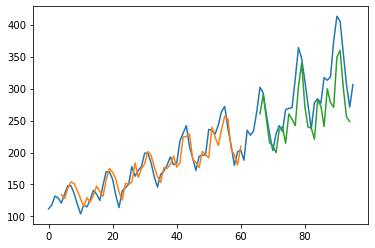

In [55]:
look_back=4
trainPredictPlot = np.empty_like(airline)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(airline)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(airline)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(airline))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()